In [23]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
%matplotlib inline

In [2]:
df = pd.read_csv('Wine.csv.xls')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [4]:
x = df.iloc[:,:-1]
y = df['Customer_Segment']

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 1) 

In [6]:
dt = DecisionTreeClassifier(criterion = 'gini')
dt.fit(xtrain, ytrain)

ypred = dt.predict(xtest)

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       0.86      0.92      0.89        13
           3       1.00      0.78      0.88         9

    accuracy                           0.92        36
   macro avg       0.93      0.90      0.91        36
weighted avg       0.92      0.92      0.92        36



In [7]:
print(dt.score(xtrain, ytrain))
print(dt.score(xtest, ytest))

1.0
0.9166666666666666


# Hyperparameter Tuning

In [8]:
from sklearn.model_selection import GridSearchCV

In [10]:
dt = DecisionTreeClassifier()

params = {
    'criterion' : ['gini', 'entropy'],
    'splitter'  : ['random', 'best'],
    'max_depth' : [1,2,3,4,5]
}

In [11]:
grid = GridSearchCV(DecisionTreeClassifier(), params)

In [12]:
grid.fit(xtrain, ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'splitter': ['random', 'best']})

In [13]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}

In [14]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, splitter = 'best')
dt.fit(xtrain, ytrain)
ypred = dt.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.86      0.92      0.89        13
           3       1.00      0.89      0.94         9

    accuracy                           0.92        36
   macro avg       0.93      0.91      0.92        36
weighted avg       0.92      0.92      0.92        36



# Decision Tree Regression

In [15]:
x = x.iloc[:,:-1]
y = df['Proline']

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.25, random_state = 1)

In [17]:
dr = DecisionTreeRegressor()

dr.fit(xtrain, ytrain)
yp = dr.predict(xtest)

In [18]:
from sklearn.metrics import r2_score

In [19]:
r2_score(ytest, yp)

0.556765081429913

In [20]:
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 250

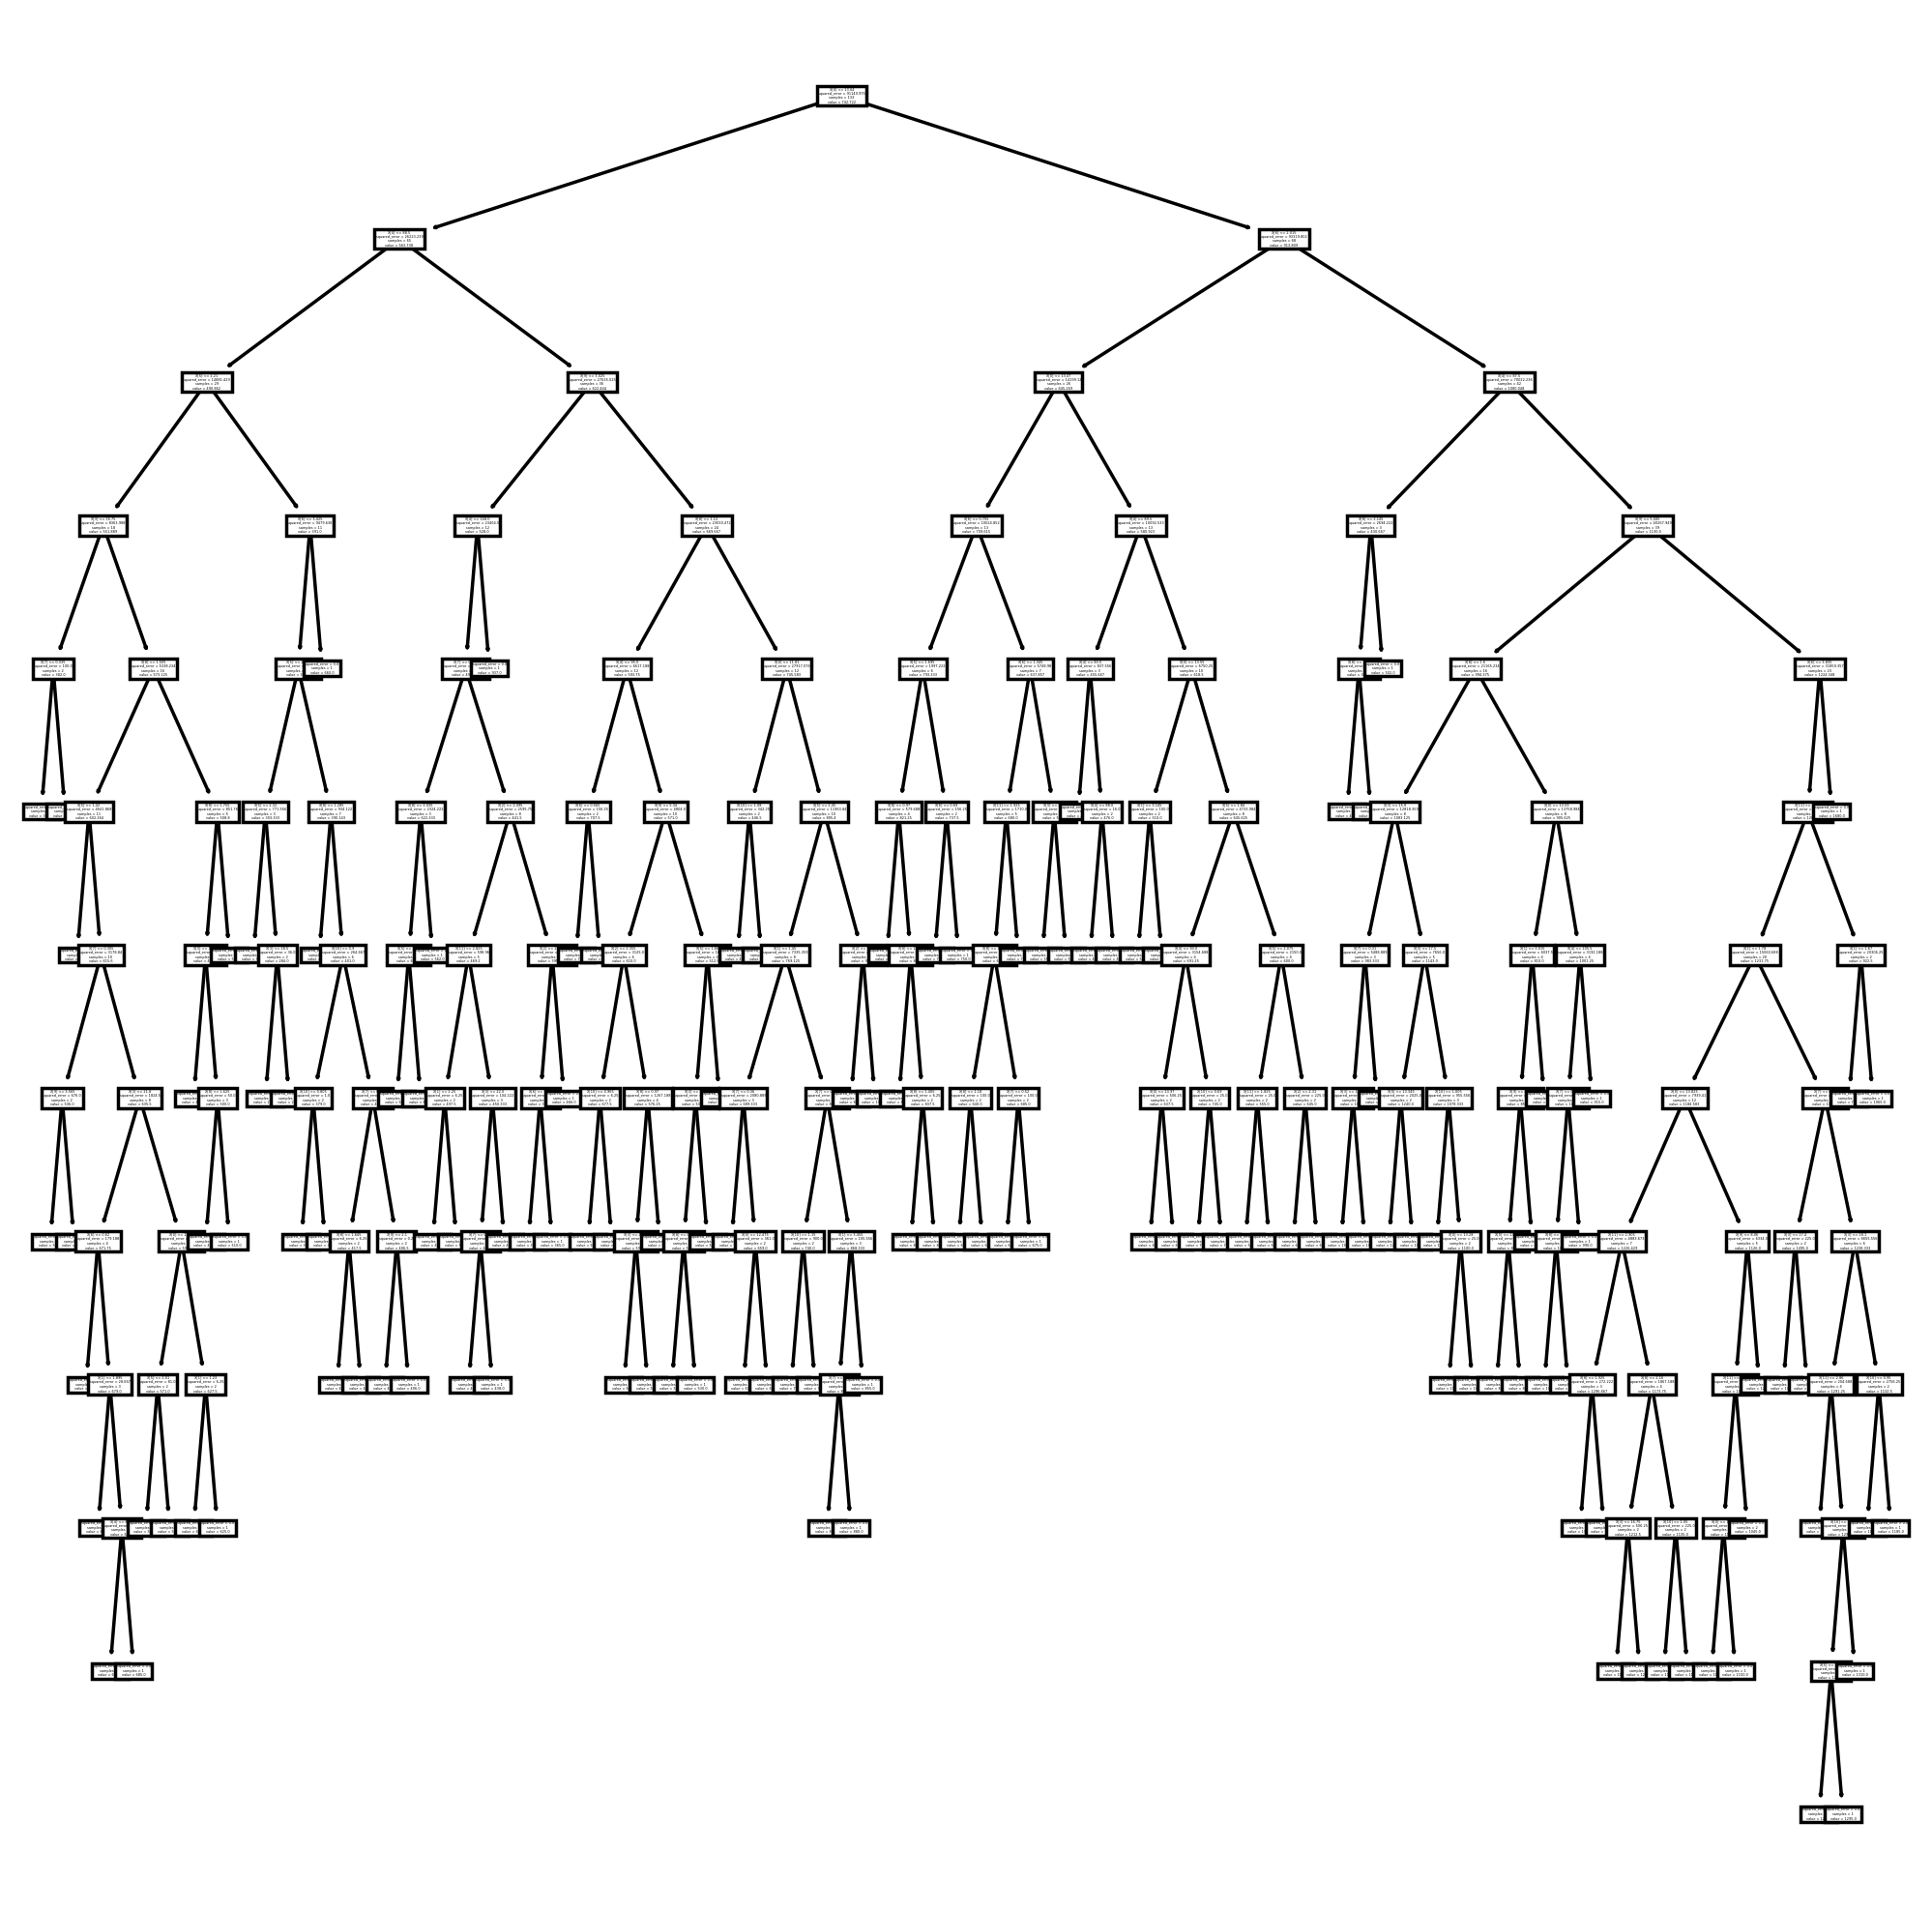

In [24]:
tree.plot_tree(dr)
plt.show()